In [1]:
import pandas as pd
import fnmatch
import os
import numpy as np 
import glob
import pandas_datareader.data as web
import math
import decimal
import random

In [22]:
#TO_ITERATE: 1/4 change path STABLE/UNSTABLE
#path = '/Users/ainur/Documents/Codes/RNN/BAXTER_raw_/Traj_1 Pick_and_Place/STABLE/'
path = '/Users/ainur/Documents/Codes/RNN/BAXTER_raw_/Traj_ 2 Cocktail_shake/STABLE/'
#TO_ITERATE: 2/4 change coefficient Traj1: ST: 0.59, UNST: 0.58, Traj2: ST: 0.61, UNST: 0.605. 
coefficient = '*0.61*'
#TO_ITERATE: 3/4 change number of files: Traj1: ST: 5, UNST: 6, Traj2: ST: 5, UNST: 6. 
num_files = 5
#TO_ITERATE: 4/4 change path to output file 
path_to_synced_data = 'Data/Synced/Method 1 Upsampled/traj2_stable.csv'


def myround(num):
    working = str(num-int(num))
    for i, e in enumerate(working[2:]):
        if e != '0':
            return int(num) + float(working[:i+4])
        
#def labeling(df):
    #TODO: Read IMU positions, if  a change in y(?) axis exceeds a treshhold, label all row as UNSTABLE, if not STABLE


def sync_sensors(trial_n):
    #Synchronization 

    all_data_tuple = []

    #Transmitting the data from files 
    for dirpath, dirnames, filenames in os.walk(path):
        #if fnmatch.fnmatch(file, '*[!p][!y]'):
       
        #iterate through every csv files
        for filename in [ f for f in filenames if f.endswith('.csv') ]:
            if not 'raw' in filename:

                #iterate through trials and combine different sensors data into one file
                
                if fnmatch.fnmatch( filename, 'trial'+ str(trial_n) + '*' ) & fnmatch.fnmatch( filename, coefficient): 


                    print (filename)

                    data = pd.read_csv( dirpath + '/' + filename )
                    data['trial']=('trial'+str(trial_n))

                    all_data_tuple.append(data)


   
    #copy each domain seperately replicating small number of entries to match the max sized domain
    print ('Length of the tuple: ', len (all_data_tuple))
       
    max_domain_size = max(map(len, all_data_tuple))
    print (max_domain_size)


    resampled_data = []

    for i in range(len(all_data_tuple)):
        df = pd.DataFrame(all_data_tuple[i])
        #all_data_tuple - across all trials/files in directory 
        df['sampling'] = pd.date_range('1/1/2018', periods=len(all_data_tuple[i]), freq='ms')
        
        #TODO: Find new solution to fill with NANs instead of sum()
        #df.drop(['%time'], axis=1)
        #Create new period for filling in dividing maximum length of domain with rest domain length each sequetially 
        new_period = '{0:.10f}'.format(1/((max_domain_size/float(len(all_data_tuple[i])))))
        new_period = myround(float(new_period))
        #The domain with maximum length has period of 1.0
        if new_period == None:
            new_period = 1.0

        #print ('New period: ', new_period)

        #Upsample other domains with new period, ? = sum()
        df = df.resample(str(new_period)+'ms', on='sampling').sum()

        #Drop the last extra readings - since the periods doesnt preciesly match - there few reading are overfilles max length
        df = df[:max_domain_size]
        df = df.reset_index(drop=True)
    
        #At this stage each domain is uspampled to a new period but the cells are empty
        
        #Fil the empty rows with the copy of the last reading
        df = df.fillna(method='pad')
        
        #df.mask(=='NaN', None).ffill()
        
        # Add each domain to a single array
        resampled_data.append(df)
        
    resampled_data_df = pd.DataFrame([])
    
    #Convert to pd.DataFrame()
    for i in range(len(resampled_data)):
        resampled_data_df = pd.concat( [resampled_data_df, pd.DataFrame(resampled_data[i])], axis = 1)
        #resampled_data_df = resampled_data_df.append(pd.DataFrame(resampled_data[i]),ignore_index=True)
    
    #print (resampled_data_df)
    return resampled_data_df


def main():
    df = pd.DataFrame([])
    df_new = pd.DataFrame([])
    
    
    for i in range (num_files): 
        #if (i!=3) and (i !=4):
        
        
        df_new = sync_sensors(i+1)

        df = df.append(df_new, ignore_index=False)
        #df_new = pd.DataFrame(sync_sensors(i+1))
        #df = df.append(df_new, ignore_index=False)
        #df = pd.concat([df, sync_sensors(i+1)], join_axes=[df.index])
    
   
    df.to_csv(path_to_synced_data)  
    print ('Total: ', len(df))
    
if __name__ == "__main__":
    main()

trial1_0.61_2017-05-26-20-20-05_accelerometer.csv
trial1_0.61_2017-05-26-20-20-05_baxter.csv
trial1_0.61_2017-05-26-20-20-05_pisahand.csv
trial1_0.61_2017-05-26-20-20-05_pressure.csv
('Length of the tuple: ', 4)
20919
trial2_0.61_2017-05-26-20-23-58_accelerometer.csv
trial2_0.61_2017-05-26-20-23-58_baxter.csv
trial2_0.61_2017-05-26-20-23-58_pisahand.csv
trial2_0.61_2017-05-26-20-23-58_pressure.csv
('Length of the tuple: ', 4)
41639
trial3_0.61_2017-05-26-20-28-52_accelerometer.csv
trial3_0.61_2017-05-26-20-28-52_baxter.csv
trial3_0.61_2017-05-26-20-28-52_pisahand.csv
trial3_0.61_2017-05-26-20-28-52_pressure.csv
('Length of the tuple: ', 4)
29280
trial4_0.61_2017-05-26-20-29-56_accelerometer.csv
trial4_0.61_2017-05-26-20-29-56_baxter.csv
trial4_0.61_2017-05-26-20-29-56_pisahand.csv
trial4_0.61_2017-05-26-20-29-56_pressure.csv
('Length of the tuple: ', 4)
25971
trial5_0.61_2017-05-26-20-35-39_accelerometer.csv
trial5_0.61_2017-05-26-20-35-39_baxter.csv
trial5_0.61_2017-05-26-20-35-39_pis

[ 60400 126118 127534 129741 134053 160338]
[ 60432 126118 127779 131301]
[ 60432 126118 127779 131301]


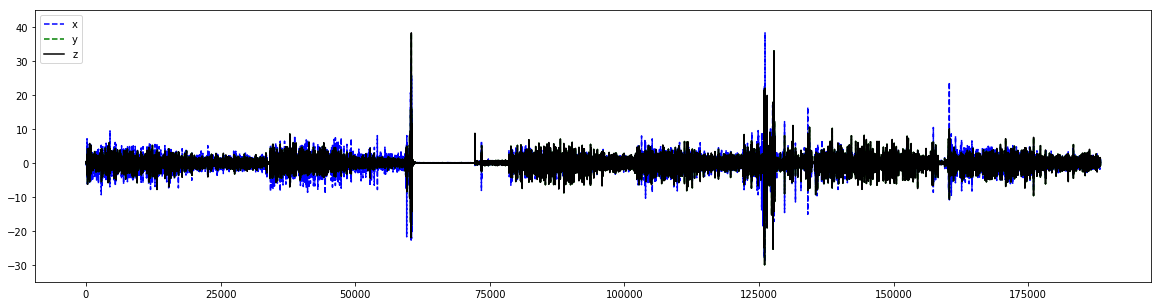

In [18]:
import matplotlib.pyplot as plt
import peakutils
import scipy.fftpack


#Re-Labelling
#
df = pd.read_csv('Data/Synced/Method 1 Upsampled/traj2_unstable.csv')
path_to_labelled = 'Data/Relabelled/Method 1 Before/labelled_traj2_unstable.csv'

#First, label all as stable
df['label'] = '1'
#path_to_labelled = 'Processed_data/Data_relabelled/labelled_1.csv'
#df.to_csv(path_to_labelled)



#
#df = pd.read_csv(path_to_synced_data)
fig=plt.figure(figsize=(20,5))
fig.show()
ax=fig.add_subplot(111)

#Caluclate the variations in accelerometer reading
x_diff = df['field.data0'].diff()
y_diff = df['field.data1'].diff()
z_diff = df['field.data1'].diff()

indexes = peakutils.indexes(z_diff, thres=0.6, min_dist=400)
#print (indexes)

ax.plot(x_diff,c='b',ls='--',label='x',fillstyle='none')
ax.plot(y_diff,c='g',ls='--',label='y')
ax.plot(z_diff,c='k',ls='-',label='z')
plt.ylim(-35, 45)
plt.legend(loc=2)
plt.draw()

#Get indexes of the rows with high peak values 
x_indexes = peakutils.indexes(x_diff, thres=0.6, min_dist=400)
y_indexes = peakutils.indexes(y_diff, thres=0.6, min_dist=400)
z_indexes = peakutils.indexes(z_diff, thres=0.6, min_dist=400)

print (x_indexes)
print (y_indexes)
print (z_indexes)

#Create new indexes with additional range adding early and later indexes 
add_before = 400
add_after = 0

#for x
new_x_indexes = []
for i in x_indexes: 
    start = i - add_before
    end = i + add_after
    for k  in range(start,end):
        
        new_x_indexes.append(k)
        
#for y
new_y_indexes = []
for i in y_indexes: 
    start = i - add_before
    end = i + add_after
    for k  in range(start,end):
        
        new_y_indexes.append(k)

#for z
new_z_indexes = []
for i in z_indexes: 
    start = i - add_before
    end = i + add_after
    for k  in range(start,end):
        
        new_z_indexes.append(k)
    
#Label rows in new_x_indexes as UNSTABLE
df.loc[df['Unnamed: 0'].isin(new_x_indexes), 'label'] = '0'
df.loc[df['Unnamed: 0'].isin(new_y_indexes), 'label'] = '0'
df.loc[df['Unnamed: 0'].isin(new_z_indexes), 'label'] = '0'

#df['label'] = (df['label'].fillna('1'))
#Save file
df.to_csv(path_to_labelled )


In [25]:
#Delete extra columns
df_1 = pd.read_csv('Data/Relabelled/Method 1 Individual/labelled_traj1_stable.csv')
df_2 = pd.read_csv('Data/Relabelled/Method 1 Individual/labelled_traj1_unstable.csv')
df_3 = pd.read_csv('Data/Relabelled/Method 1 Individual/labelled_traj2_stable.csv')
df_4 = pd.read_csv('Data/Relabelled/Method 1 Individual/labelled_traj2_unstable.csv')

#Specify which dataframe to concat 
df = pd.concat([df_3, df_4])


df = df.drop(['%time', '%time.1', '%time.2', '%time.3', 'Unnamed: 0', 'Unnamed: 0.1',
              'field.header.seq', 'field.header.seq.1','field.header.stamp', 'field.header.stamp.1', 
              'field.header.frame_id', 'field.header.frame_id.1', 'field.position0', 'field.position1',
              'field.position9', 'field.position10', 'field.position11', 'field.position12','field.position13', 'field.position14',
              'field.position15',  'field.velocity0', 'field.velocity1',  'field.velocity9', 'field.velocity10',  'field.velocity11', 
              'field.velocity16', 'field.velocity12', 'field.velocity13',  'field.velocity14', 'field.velocity15', 'field.velocity16',
              'field.effort0', 'field.effort1', 'field.effort9', 'field.effort10', 'field.effort11', 'field.effort12','field.effort13', 'field.effort14', 
              'field.effort15', 'field.effort16', 'field.header.frame_id', 'field.header.frame_id.1', 
              ], axis=1)
print ("Number of columns: ", len(df.columns))
df.to_csv('Data/toRNN/traj2_data.csv')
print ("Dataa/toRNN/data.csv")


('Number of columns: ', 50)
Saved to Processed_data/DAta_toRNN/data.csv


In [31]:
df = pd.read_csv('Data/Synced/Method 1 Upsampled/traj2_stable.csv')
path_to_labelled = 'Data/Relabelled/Method 2 Whole /labelled_traj2_stable.csv'

#First, label all as stable
df['label'] = '1'
df = df.drop(['%time', '%time.1', '%time.2', '%time.3', 'Unnamed: 0', 
              'field.header.seq', 'field.header.seq.1','field.header.stamp', 'field.header.stamp.1', 
              'field.header.frame_id', 'field.header.frame_id.1', 'field.position0', 'field.position1',
              'field.position9', 'field.position10', 'field.position11', 'field.position12','field.position13', 'field.position14',
              'field.position15',  'field.velocity0', 'field.velocity1',  'field.velocity9', 'field.velocity10',  'field.velocity11', 
              'field.velocity16', 'field.velocity12', 'field.velocity13',  'field.velocity14', 'field.velocity15', 'field.velocity16',
              'field.effort0', 'field.effort1', 'field.effort9', 'field.effort10', 'field.effort11', 'field.effort12','field.effort13', 'field.effort14', 
              'field.effort15', 'field.effort16', 'field.header.frame_id', 'field.header.frame_id.1', 
              ], axis=1)
#path_to_labelled = 'Processed_data/Data_relabelled/labelled_1.csv'
df.to_csv(path_to_labelled)

In [34]:
#Delete extra columns
df_1 = pd.read_csv('Data/Relabelled/Method 2 Whole /labelled_traj1_stable.csv')
df_2 = pd.read_csv('Data/Relabelled/Method 2 Whole /labelled_traj1_unstable.csv')
df_3 = pd.read_csv('Data/Relabelled/Method 2 Whole /labelled_traj2_stable.csv')
df_4 = pd.read_csv('Data/Relabelled/Method 2 Whole /labelled_traj2_unstable.csv')

#Specify which dataframe to concat 
df = pd.concat([df_3, df_4])

print ("Number of columns: ", len(df.columns))
df.to_csv('Data/toRNN/traj2_data.csv')
print ("Saved to Data/toRNN/traj2_data.csv")

('Number of columns: ', 51)
Saved to Processed_data/DAta_toRNN/traj2_data.csv
